In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import *
import sklearn.metrics as metrics
import pickle

In [2]:
data = pd.read_csv('../asset/smart_grid_stability_augmented.csv')

In [3]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789,unstable


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [5]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [6]:
data.shape

(60000, 14)

In [7]:
mapping = {'unstable': 0, 'stable': 1}
data['stabf'] = data['stabf'].map(mapping)

In [8]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,0


In [9]:
print(data['stabf'].value_counts(normalize=True))

stabf
0    0.638
1    0.362
Name: proportion, dtype: float64


In [10]:
data['stabf'].value_counts()

stabf
0    38280
1    21720
Name: count, dtype: int64

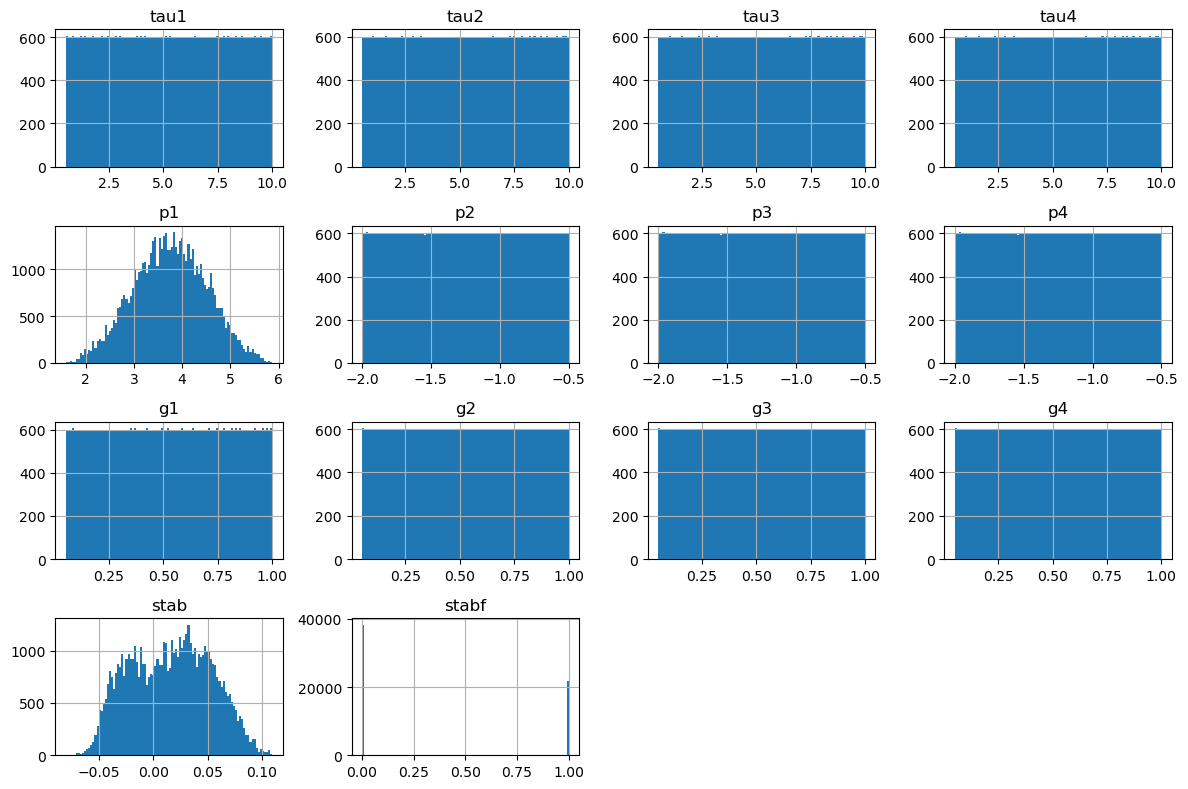

In [11]:
data.hist(bins=100, figsize=(12,8))
plt.tight_layout()
plt.show()

In [12]:
data = data.drop('stab', axis=1)

In [13]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [14]:
X = data.drop('stabf', axis=1)
y = data['stabf']

In [15]:
X.shape, y.shape

((60000, 12), (60000,))

In [16]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923


In [17]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: stabf, dtype: int64

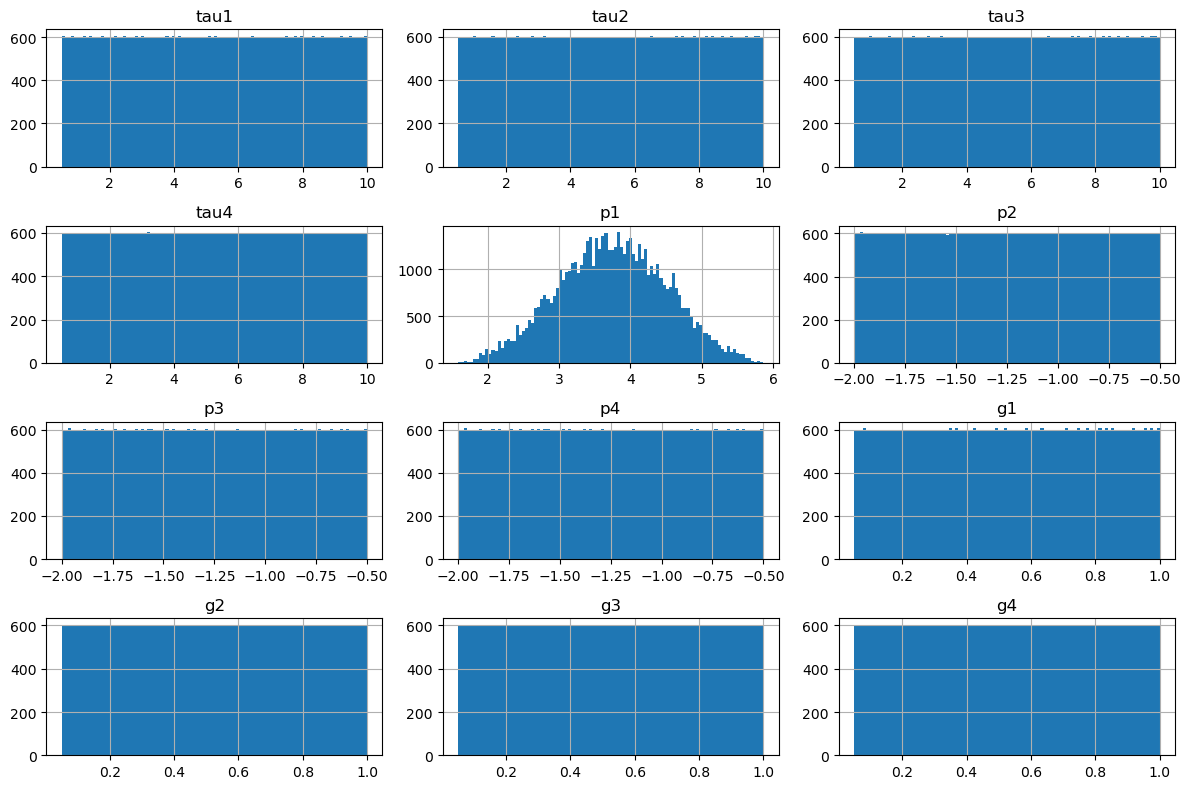

In [18]:
X.hist(bins=100, figsize=(12,8))
plt.tight_layout()
plt.show()

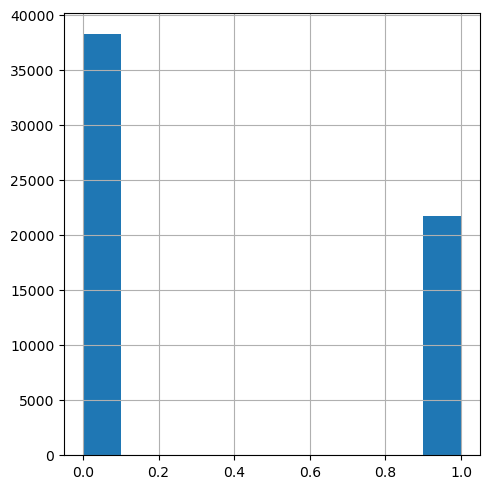

In [19]:
y.hist(bins=10, figsize=(5,5))
plt.tight_layout()
plt.show()

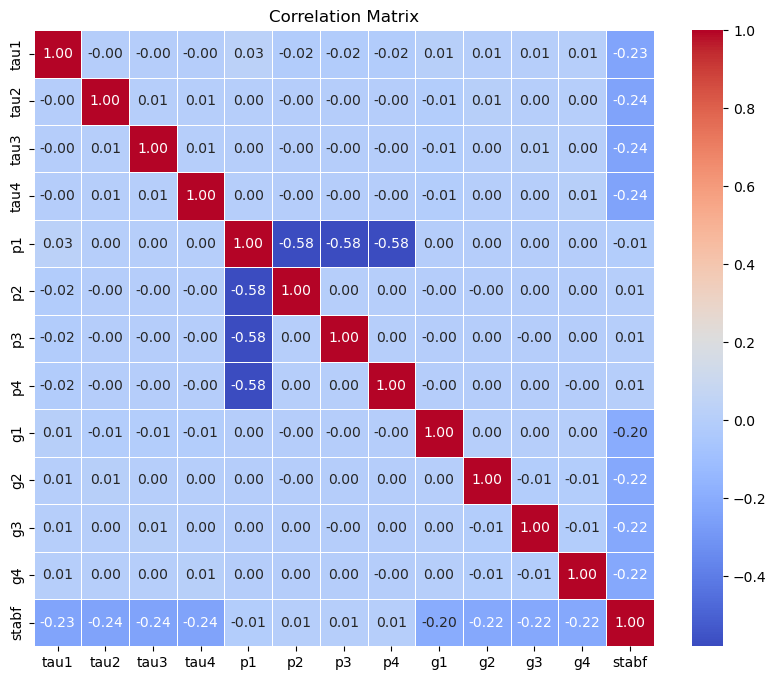

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42000, 12), (18000, 12), (42000,), (18000,))

In [23]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [24]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((9000, 12), (9000, 12), (9000,), (9000,))

In [25]:
print("Percentage of stable grid in Training set: ", (y_train[y_train == 1].count() / y_train.count()) * 100, "%")
print("Percentage of stable grid in Testing set: ", (y_test[y_test == 1].count() / y_test.count()) * 100, "%")
print("Percentage of stable grid in Validation set: ", (y_val[y_val == 1].count() / y_val.count()) * 100, "%")

Percentage of stable grid in Training set:  36.18571428571429 %
Percentage of stable grid in Testing set:  36.922222222222224 %
Percentage of stable grid in Validation set:  35.544444444444444 %


In [26]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)

In [27]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
918,7.846974,8.877354,5.843796,5.895582,3.983750,-1.618278,-0.728624,-1.636848,0.932917,0.581647,0.640909,0.305371
17141,3.007313,8.684800,6.074018,0.858635,4.230058,-0.773622,-1.937173,-1.519263,0.924423,0.941520,0.793961,0.133047
15558,7.992806,4.957976,7.922754,7.774422,3.566676,-0.682930,-1.272413,-1.611333,0.942250,0.818530,0.973506,0.400792
27327,2.244237,7.194479,8.293343,7.809539,2.430400,-0.517186,-0.662992,-1.250222,0.363491,0.136525,0.082320,0.773569
11606,4.471082,7.895908,7.413906,1.128001,3.221704,-1.950386,-0.598811,-0.672507,0.142971,0.820521,0.531451,0.811377


In [28]:
X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape

((42000, 12), (9000, 12), (9000, 12))

In [29]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)

In [30]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

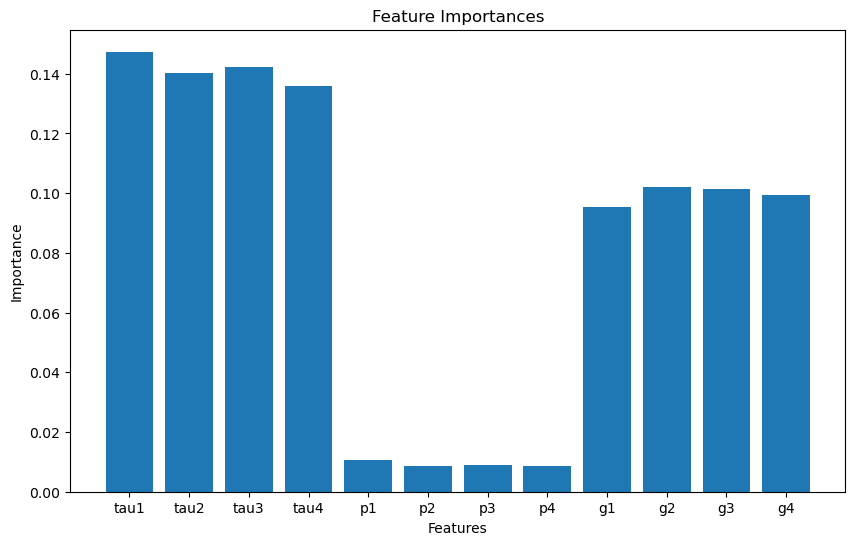

Feature Importances:
tau1: 0.14738053651798072
tau2: 0.1400891014344538
tau3: 0.1422840497942348
tau4: 0.13585573353760316
p1: 0.010605246767537924
p2: 0.008505818189300792
p3: 0.008800783077843833
p4: 0.008462770525621815
g1: 0.09520597502544943
g2: 0.10222329734450458
g3: 0.10131308279675882
g4: 0.09927360498871036


In [31]:
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")



In [32]:
y_pred_train = model.predict(X_train_scaled)
y_pred_val = model.predict(X_val_scaled)
y_pred_test = model.predict(X_test_scaled)

In [33]:
train_accuracy = accuracy_score(y_train, y_pred_train) * 100
val_accuracy = accuracy_score(y_val, y_pred_val) * 100
test_accuracy = accuracy_score(y_test, y_pred_test) * 100

print("Training Accuracy: ", train_accuracy, "%")
print("Validation Accuracy: ", val_accuracy, "%")
print("Testing Accuracy: ", test_accuracy, "%")

Training Accuracy:  96.19047619047619 %
Validation Accuracy:  92.45555555555556 %
Testing Accuracy:  91.72222222222223 %


In [34]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
sensitivity = metrics.recall_score(y_test, y_pred_test)
specificity = metrics.recall_score(y_test, y_pred_test, pos_label=0)
precision = metrics.precision_score(y_test, y_pred_test)
f1_score = metrics.f1_score(y_test, y_pred_test)

print("Accuracy: ", accuracy)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("F1 Score: ", f1_score)

Accuracy:  0.9172222222222223
Sensitivity:  0.8371953054468854
Specificity:  0.9640655275673772
Precision:  0.9316811788345613
F1 Score:  0.8819147249960374


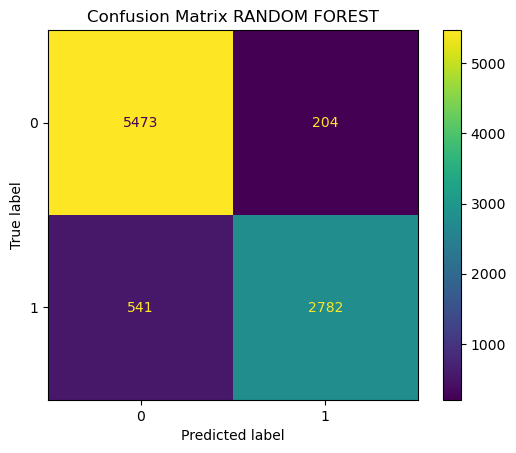

In [35]:
confusion_matrix5 = metrics.confusion_matrix(y_test, y_pred_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5)
cm_display.plot()
plt.title('Confusion Matrix RANDOM FOREST')
plt.show()